In [1]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt
import roadrunner as rr

In [2]:
modelName = "Model1bound"
#modelName = "Model2bound"


model = bionetgen.bngmodel(modelName + ".bngl") 
sim = model.setup_simulator() 
sim.setIntegrator('cvode')


In [3]:
for s in model.species:
    print(s, model.species[s])

0 Ras(a~0,sos) _InitialConc1
1 Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS


In [5]:
free_Ras = None
bound_SOS = None

for s in model.species:
    label = str(s)
    if label.startswith("Ras(a~0,sos) RasTotal"):
        free_Ras = s
    elif label.startswith("Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS"):
        bound_SOS = s

print("Free Ras:", free_Ras)
print("Bound SOS:", bound_SOS)

Free Ras: None
Bound SOS: None


In [6]:

species_list = list(model.species)  # convert to list  access by index
free_Ras  = species_list[0]  # Ras(a~0,sos) RasTotal
bound_SOS = species_list[1]  # Ras(a~0,sos!1).Sos(ras!1) initialBoundSOS

# Number of initially bound SOS
n_bound = 1

RasTotal = 1000 

model.species[bound_SOS] = n_bound
model.species[free_Ras] = RasTotal - n_bound

print("Free Ras count:", model.species[free_Ras])
print("Bound SOS count:", model.species[bound_SOS])




Free Ras count: 999
Bound SOS count: 1


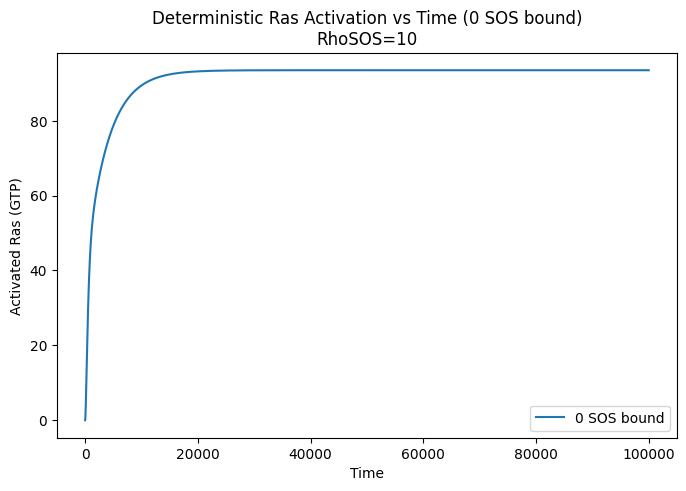

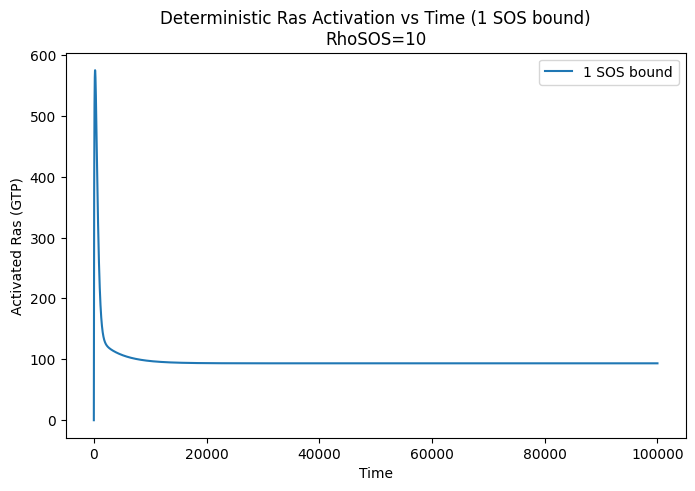

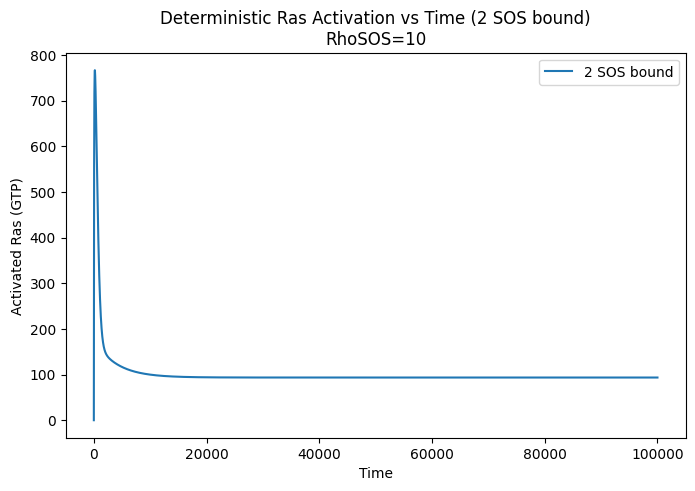

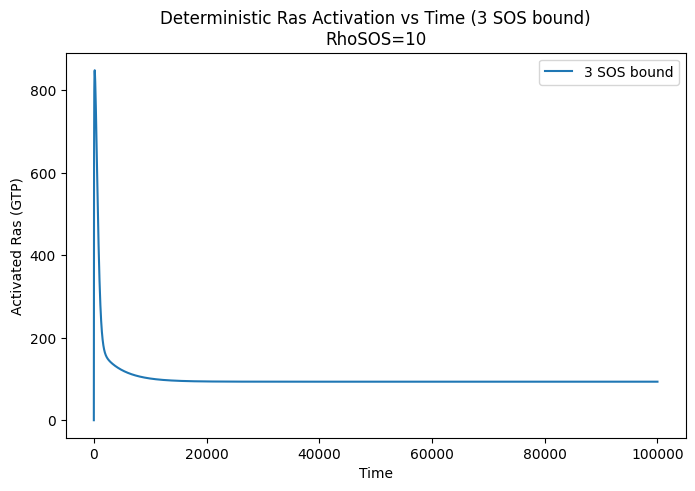

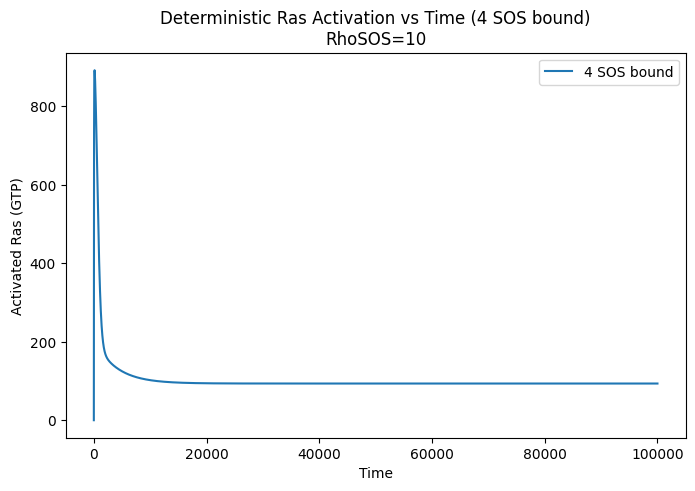

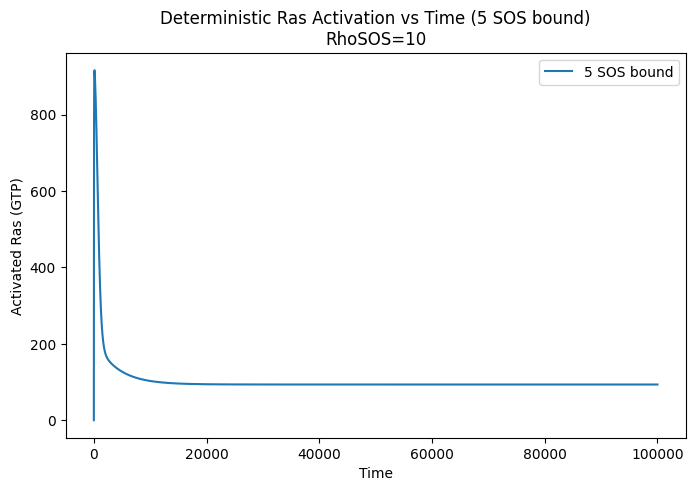

In [33]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

   
    plt.figure(figsize=(8,5))
    plt.plot(traj[:, 0], traj[:, 1], label=f'{n_bound} SOS bound')  # time vs totalRasGTP
    plt.xlabel('Time')
    plt.ylabel('Activated Ras (GTP)')
    plt.title(f'Deterministic Ras Activation vs Time ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()

In [34]:
import numpy as np

time = traj[:, 0]
ras_gtp = traj[:, 1]

eps = 1e-4  #  tolerance for change / difference 
window = 10  # number of consecutive points required

final_value = ras_gtp[-1]

# Compute relative changes
rel_change = np.abs(np.diff(ras_gtp)) / final_value

steady_idx = None
for i in range(len(rel_change) - window):
    if np.all(rel_change[i:i+window] < eps):
        steady_idx = i
        break

if steady_idx is not None:
    t_steady = time[steady_idx]
    print(f"{n_bound} SOS bound: steady state at t ≈ {t_steady:.2f}")
else:
    print(f"{n_bound} SOS bound: steady state not reached by t_end")


5 SOS bound: steady state at t ≈ 13631.36


0 SOS bound - steady state at t ≈ 10461.0


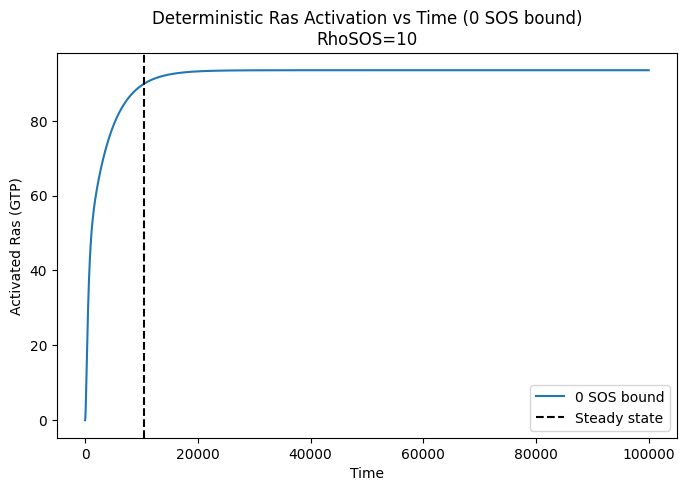

1 SOS bound - steady state at t ≈ 10151.0


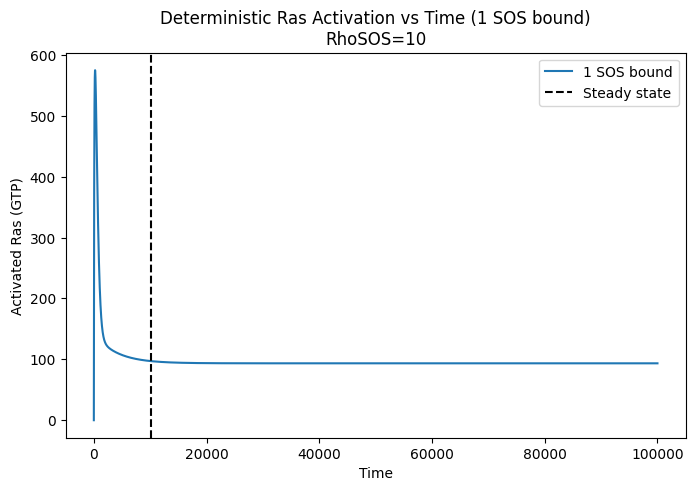

2 SOS bound - steady state at t ≈ 12171.2


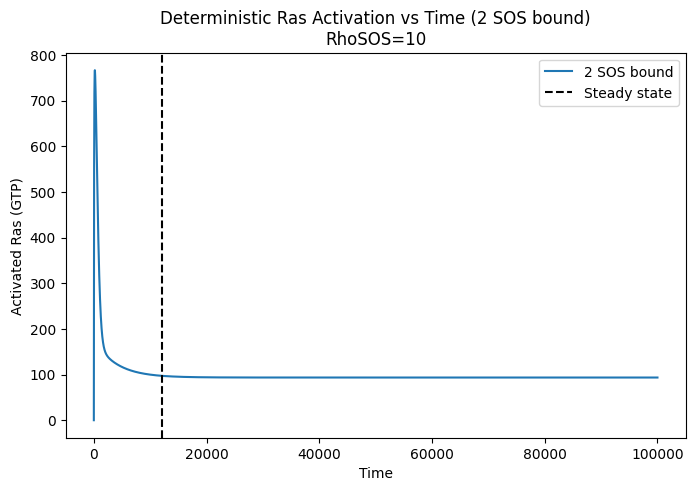

3 SOS bound - steady state at t ≈ 12921.3


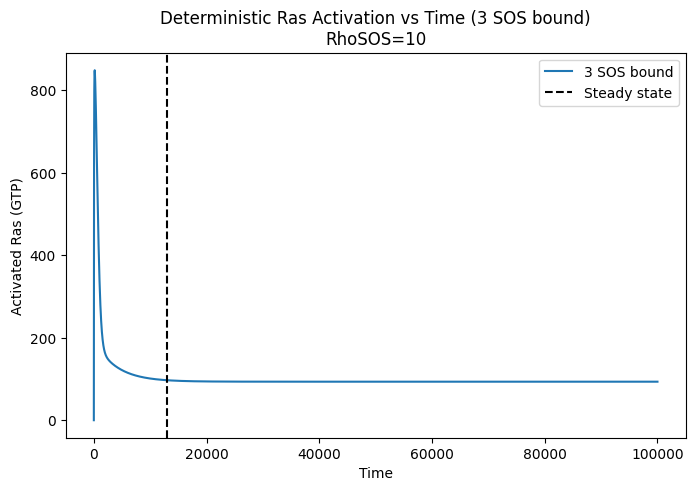

4 SOS bound - steady state at t ≈ 13341.3


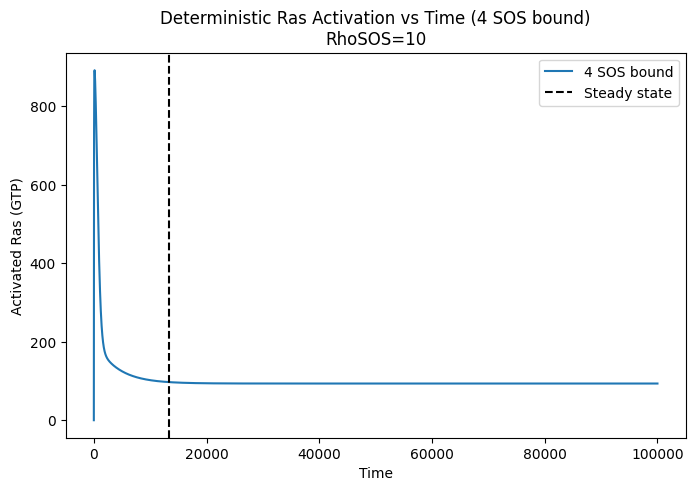

5 SOS bound - steady state at t ≈ 13631.4


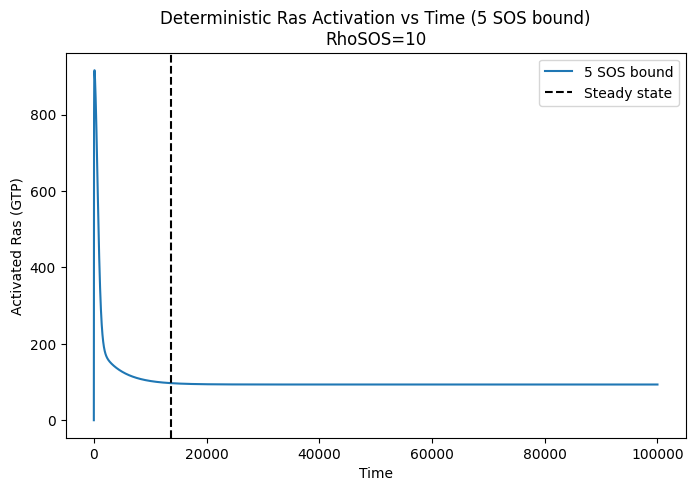

In [ ]:
import bionetgen
import numpy as np
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10  # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

# steady-state detection parameters
eps = 1e-4     # relative tolerance
window = 20    # consecutive points required

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")
    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    # set parameters
    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 
    sim.reset()

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']
    traj = sim.simulate(0, t_end, n_steps)

    time = traj[:, 0]
    ras_gtp = traj[:, 1]

    # --- steady-state calculation ---
    final_value = ras_gtp[-1]
    rel_change = np.abs(np.diff(ras_gtp)) / final_value

    steady_idx = None
    for i in range(len(rel_change) - window):
        if np.all(rel_change[i:i+window] < eps):
            steady_idx = i
            break

    if steady_idx is not None:
        t_steady = time[steady_idx]
        print(f"{n_bound} SOS bound - steady state at t ≈ {t_steady:.1f}")
    else:
        t_steady = None
        print(f"{n_bound} SOS bound - steady state NOT reached")

    # --- plotting ---
    plt.figure(figsize=(8,5))
    plt.plot(time, ras_gtp, label=f'{n_bound} SOS bound')

    if t_steady is not None: 
        plt.axvline(t_steady, color='k', linestyle='--',
                    label='Steady state')

    plt.xlabel('Time')
    plt.ylabel('Activated Ras (GTP)')
    plt.title(f'Deterministic Ras Activation vs Time ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()


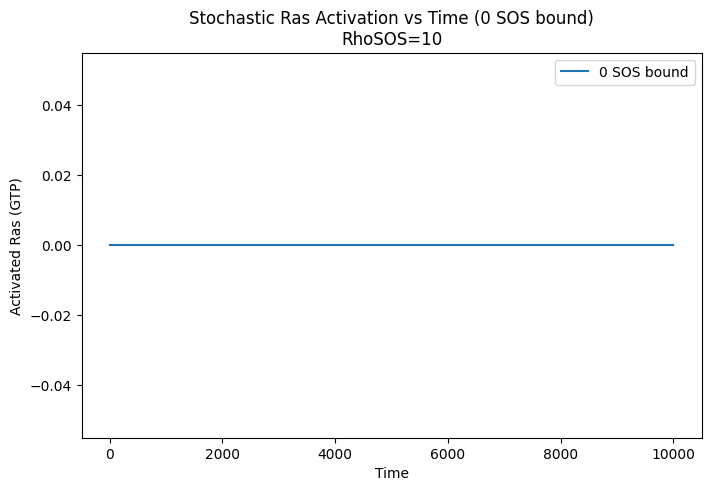

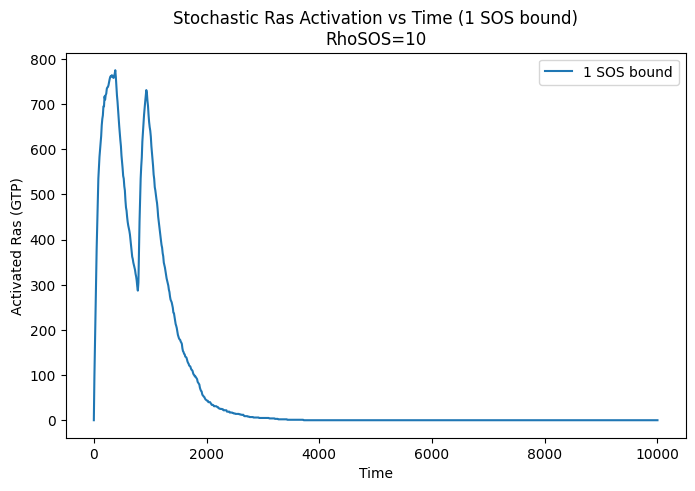

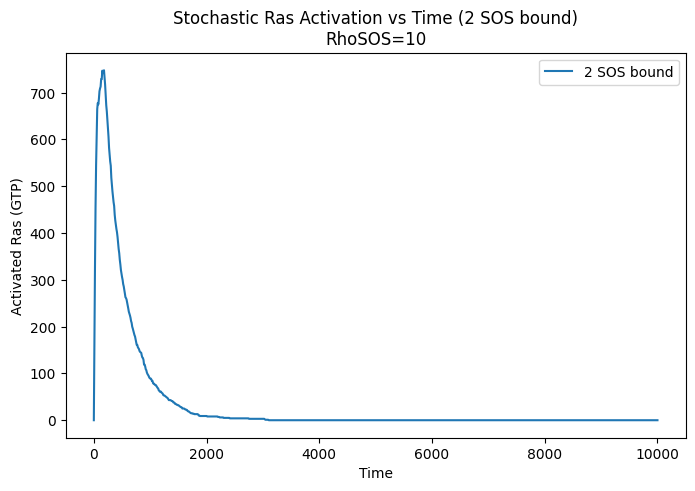

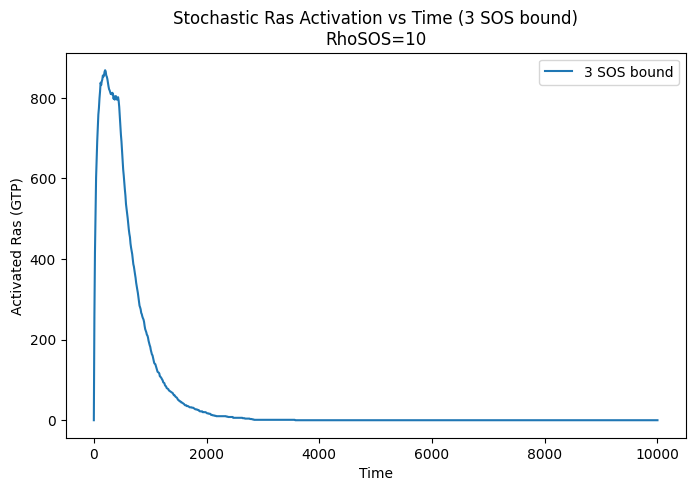

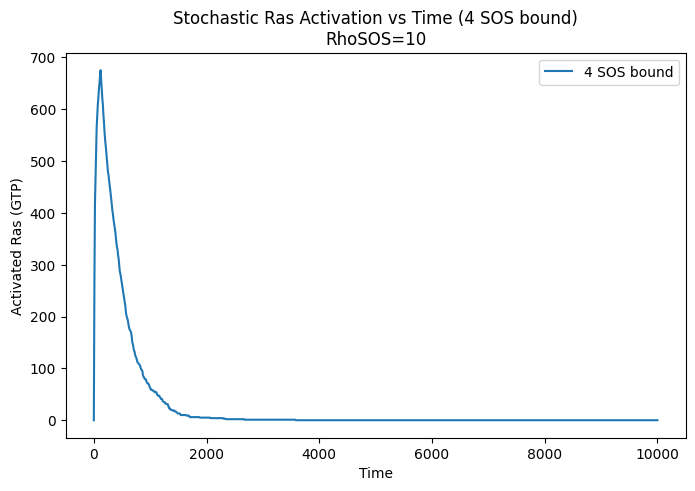

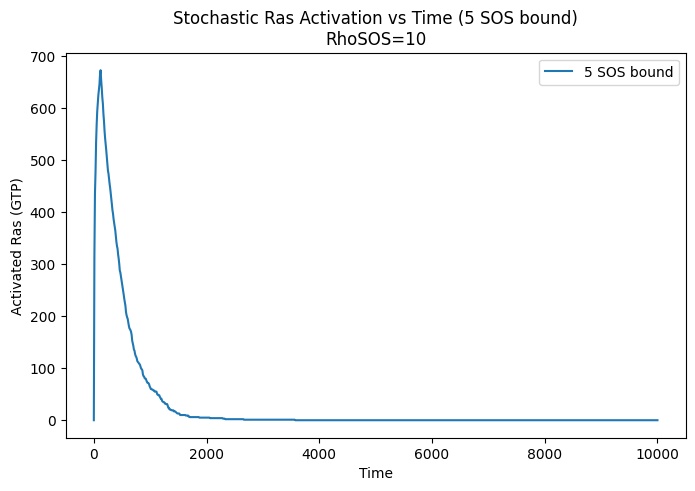

In [46]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 10000
n_steps = 1000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('gillespie')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

   
    plt.figure(figsize=(8,5))
    plt.plot(traj[:, 0], traj[:, 1], label=f'{n_bound} SOS bound')  # time vs totalRasGTP
    plt.xlabel('Time')
    plt.ylabel('Activated Ras (GTP)')
    plt.title(f'Stochastic Ras Activation vs Time ({n_bound} SOS bound)\nRhoSOS={RhoSOS}')
    plt.legend()
    plt.show()

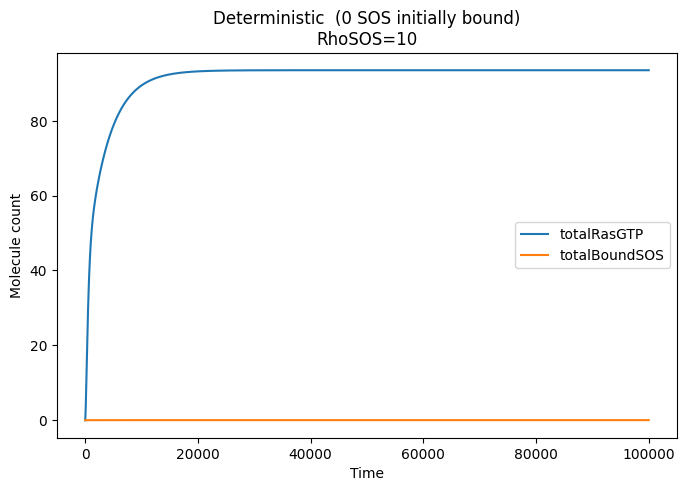

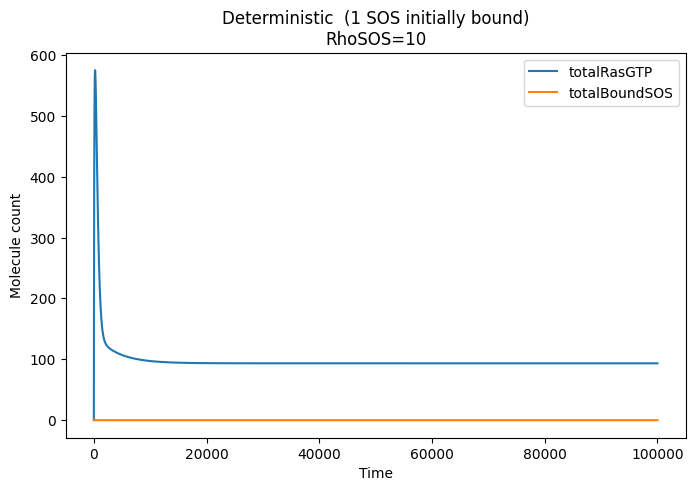

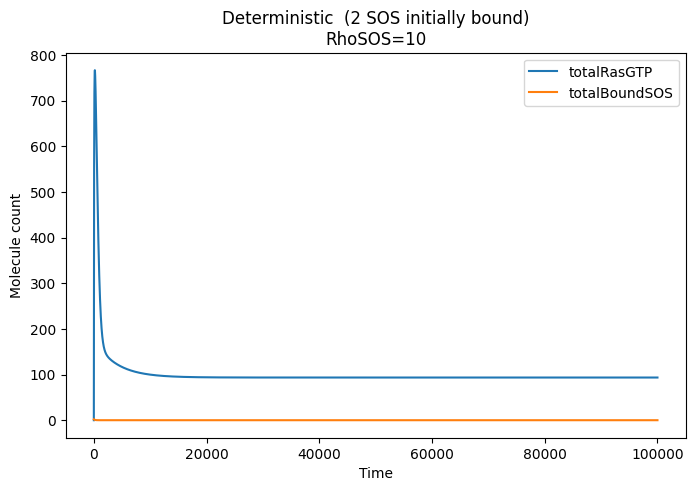

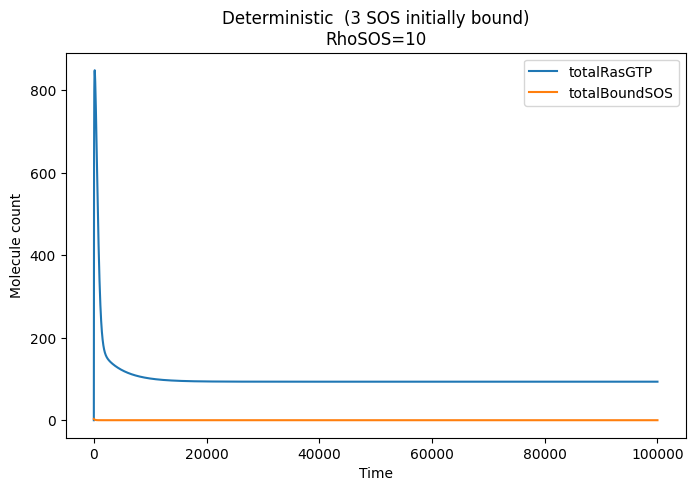

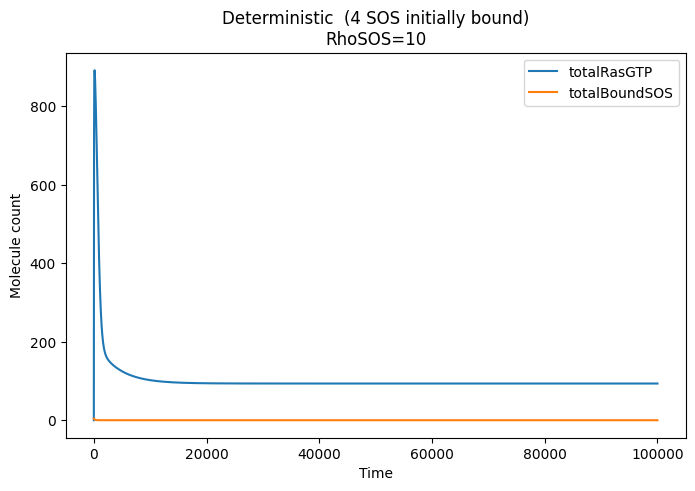

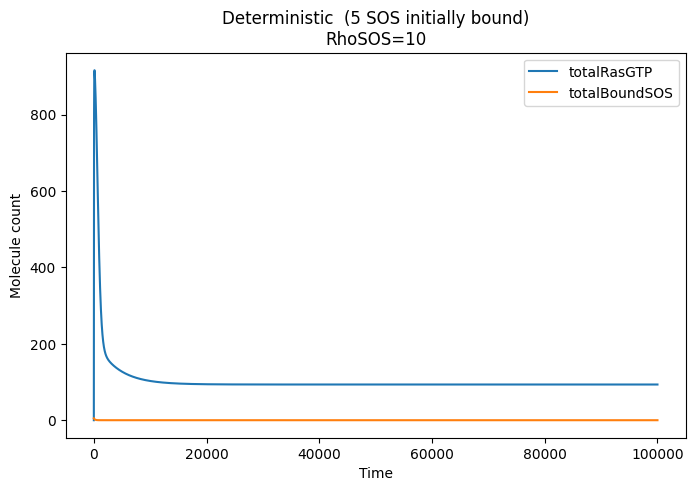

In [47]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration 
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 100000
n_steps = 10000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('cvode')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

  
    plt.figure(figsize=(8,5))

    plt.plot(traj[:, 0], traj[:, 1], label='totalRasGTP')
    plt.plot(traj[:, 0], traj[:, 2], label='totalBoundSOS')

    plt.xlabel('Time')
    plt.ylabel('Molecule count')
    plt.title(
        f'Deterministic  ({n_bound} SOS initially bound)\nRhoSOS={RhoSOS}'
    )
    plt.legend()
    plt.show()

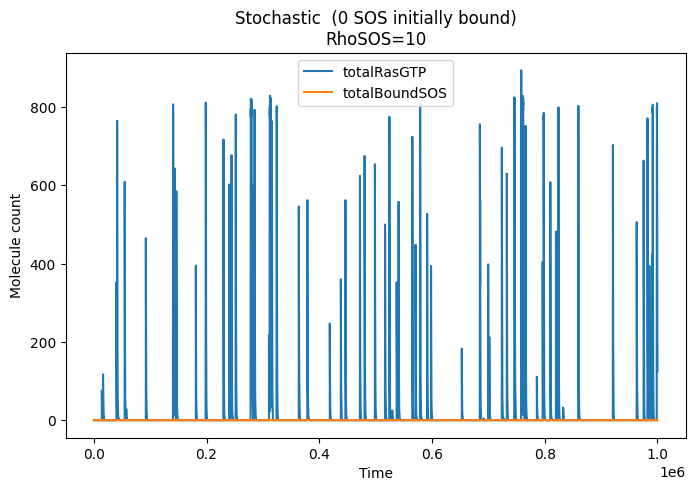

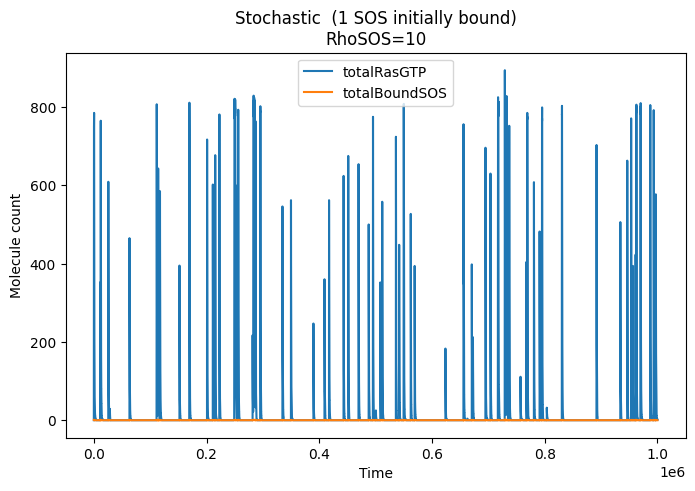

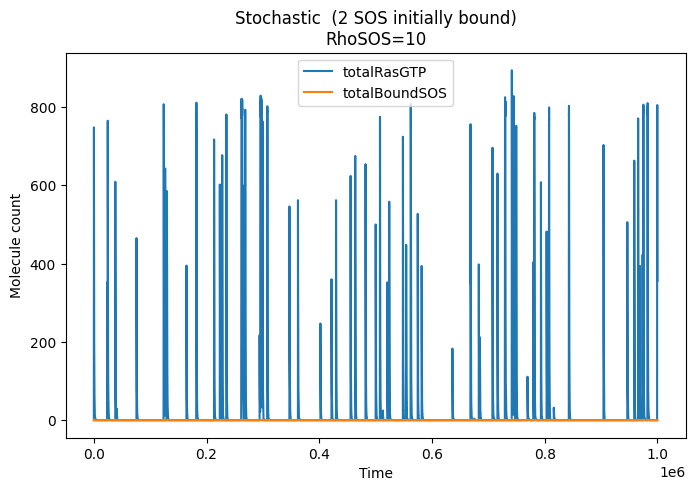

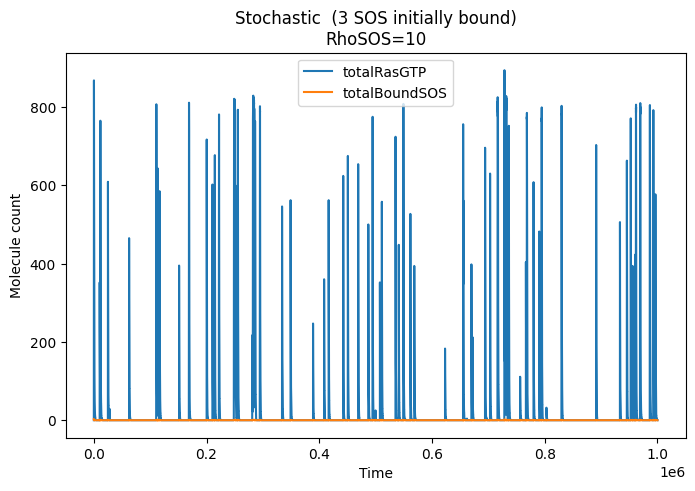

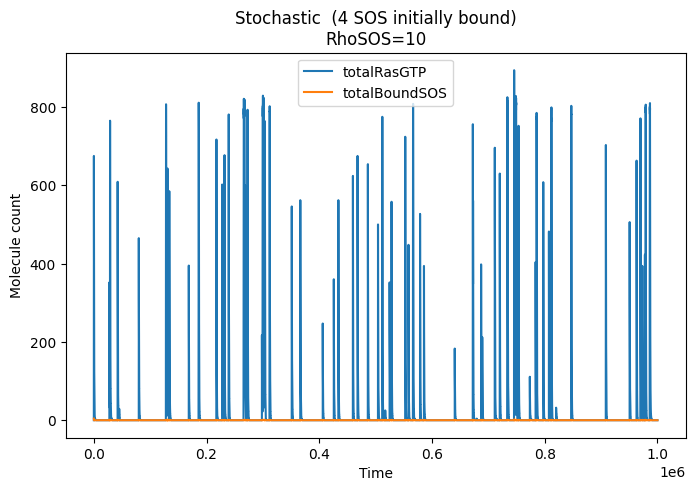

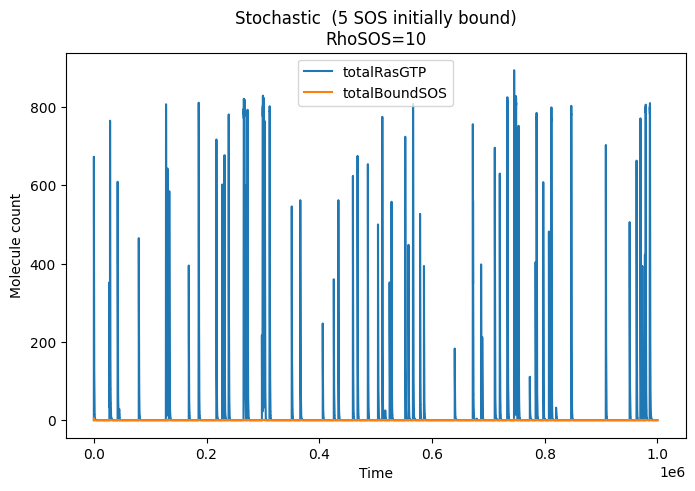

In [48]:
import bionetgen
import matplotlib.pyplot as plt

#modelName = "Model2bound"
modelName = "Model1bound"
RasTotal = 1000
RhoSOS = 10 # SOS concentration to change
n_bound_list = [0, 1, 2, 3, 4, 5]

t_end = 1000000
n_steps = 100000

for n_bound in n_bound_list:
   
    model = bionetgen.bngmodel(modelName + ".bngl")

    sim = model.setup_simulator()
    sim.setIntegrator('gillespie')

    #  initial counts  PARAMETER values
    #model.parameters['initialBoundSOS'].value = n_bound
    #model.parameters['RasTotal'].value = RasTotal - n_bound
    #model.parameters['RhoSOS'].value = RhoSOS 

    sim.RasTotal = RasTotal - n_bound
    sim.initialBoundSOS = n_bound
    sim.RhoSOS = RhoSOS 

    sim.reset()

    # Setup simulator AFTER updating parameters
    

    sim.selections = ['time', 'totalRasGTP', 'totalBoundSOS', 'TotalRas']

    traj = sim.simulate(0, t_end, n_steps)

    plt.figure(figsize=(8,5))

    plt.plot(traj[:, 0], traj[:, 1], label='totalRasGTP')
    plt.plot(traj[:, 0], traj[:, 2], label='totalBoundSOS')

    plt.xlabel('Time')
    plt.ylabel('Molecule count')
    plt.title(
        f'Stochastic  ({n_bound} SOS initially bound)\nRhoSOS={RhoSOS}'
    )
    plt.legend()
    plt.show()